In [63]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata

In [3]:
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15) # umap only used for the visualization, does not have an effect on the annotation with 'score_genes'

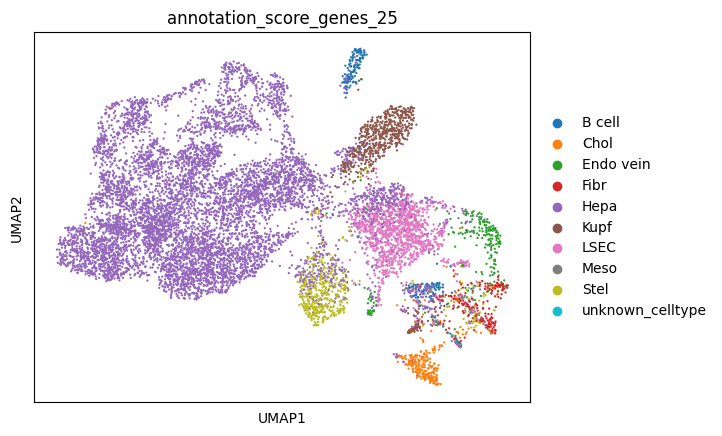

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
                  annotation_score_genes_25
B cell                             1.950481
Chol                               2.511578
Endo vein                          2.066263
Fibr                               2.030638
Hepa                              70.137157
Kupf                               5.860349
LSEC                              10.758817
Meso                               0.115782
Stel                               4.551122
unknown_celltype                   0.017813


In [4]:
# Original score_genes with basic marker gene list
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
mg_dict, scoresper_cluster = score_genes_bins(
    sdata = sdata,
    path_marker_genes = path_mg,
    bins = 25)
visualize_classification(sdata,'annotation_score_genes_25','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

In [ ]:
# Own score genes with basic marker gene list
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
scores = own_score_genes(sdata.table,path_mg)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',path_mg,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

Hepa         0.661293
LSEC         0.114179
Stel         0.077663
Kupf         0.059316
B cell       0.025828
Chol         0.021553
Endo vein    0.015853
Fibr         0.015052
Unknown      0.005166
Meso         0.004097
Name: annotation_own_score_genes, dtype: float64


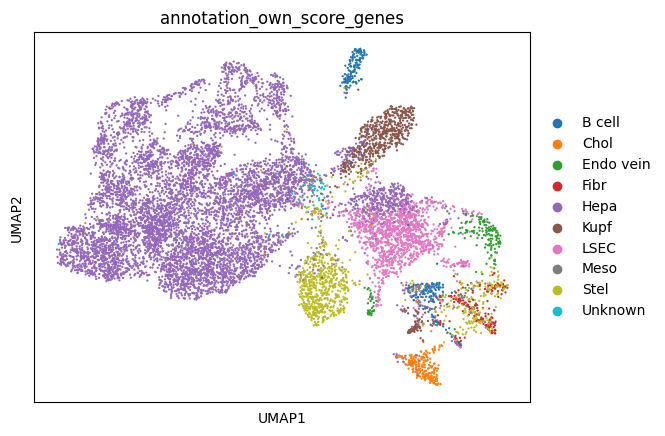

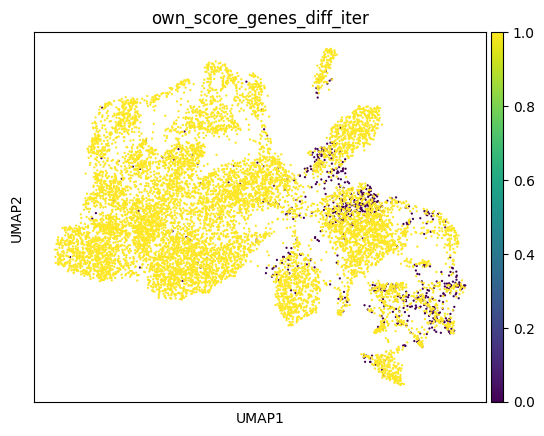

0.06359102244389027


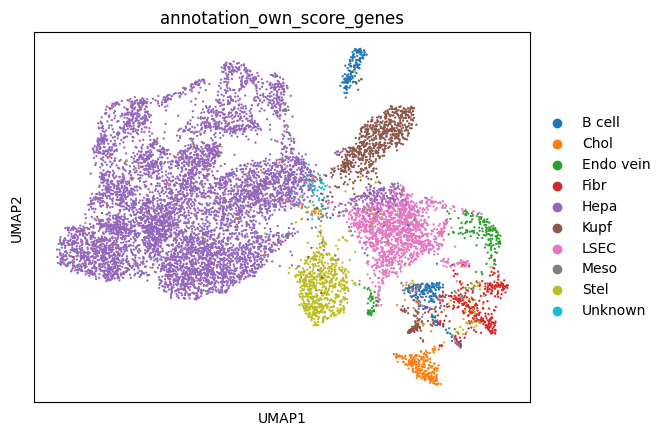

Hepa         0.626291
LSEC         0.126826
Kupf         0.072943
Stel         0.063769
Fibr         0.030994
B cell       0.027253
Chol         0.025472
Endo vein    0.019059
Unknown      0.005166
Meso         0.002227
Name: annotation_own_score_genes, dtype: float64


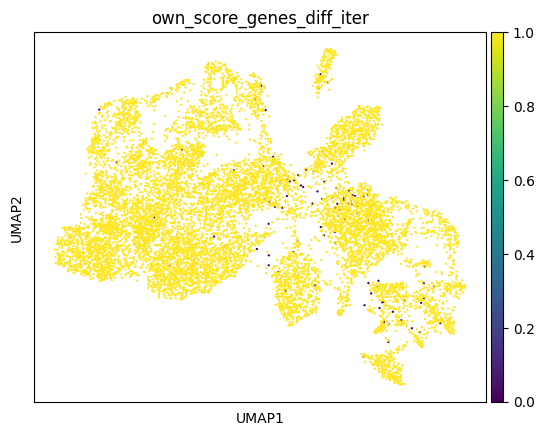

0.00908443177769861


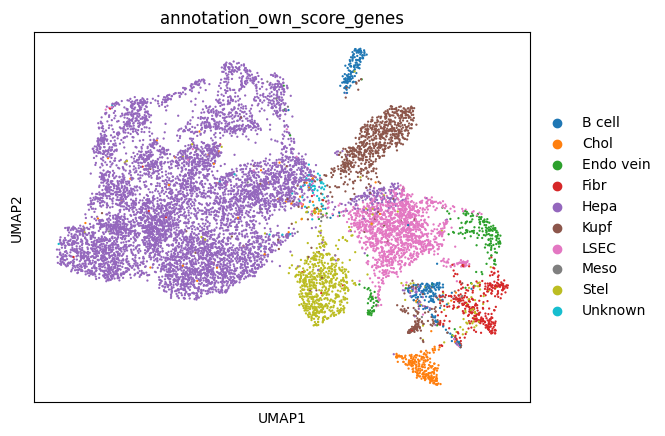

Hepa         0.621393
LSEC         0.128162
Kupf         0.077040
Stel         0.062700
Fibr         0.031796
B cell       0.027164
Chol         0.025294
Endo vein    0.019059
Unknown      0.005166
Meso         0.002227
Name: annotation_own_score_genes, dtype: float64


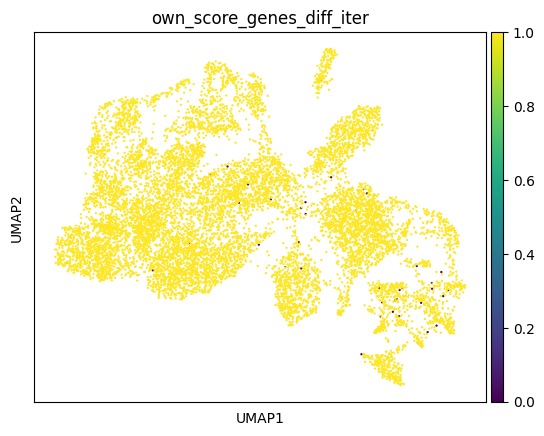

0.0038297114356964732


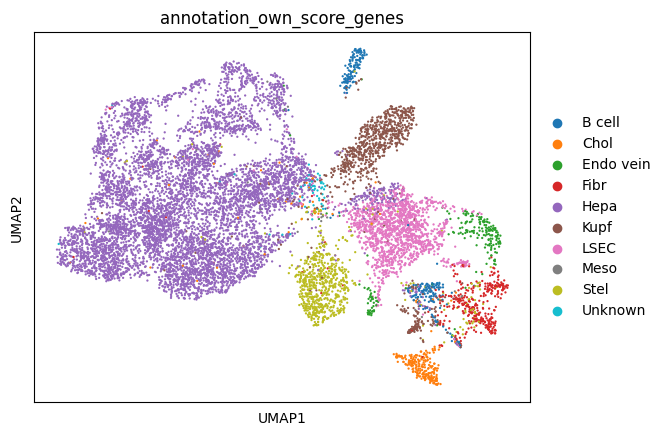

Hepa         0.619879
LSEC         0.128340
Kupf         0.078554
Stel         0.061899
Fibr         0.033042
B cell       0.026363
Chol         0.025650
Endo vein    0.018881
Unknown      0.005166
Meso         0.002227
Name: annotation_own_score_genes, dtype: float64


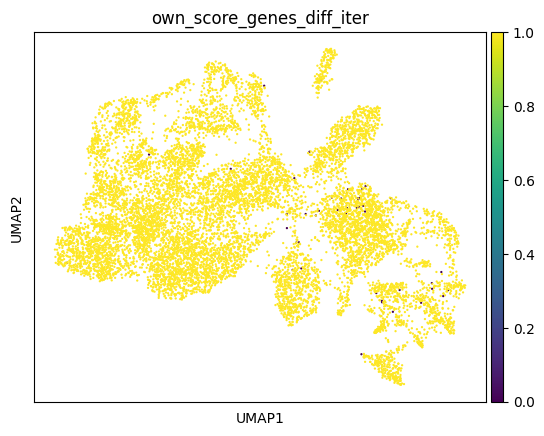

0.004364089775561097


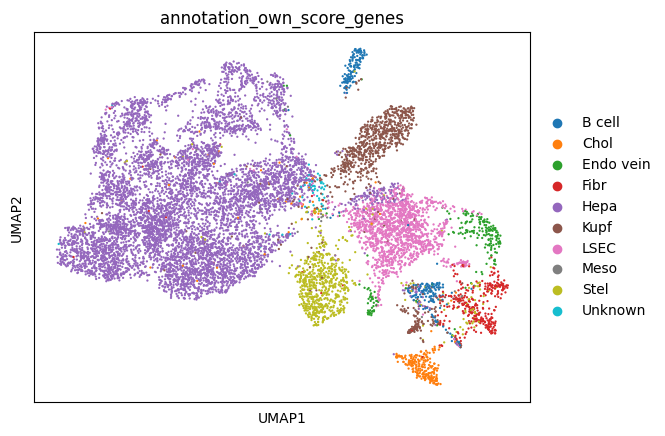

Hepa         0.617563
LSEC         0.130032
Kupf         0.079444
Stel         0.062344
Fibr         0.032152
B cell       0.026808
Chol         0.025116
Endo vein    0.019149
Unknown      0.005166
Meso         0.002227
Name: annotation_own_score_genes, dtype: float64


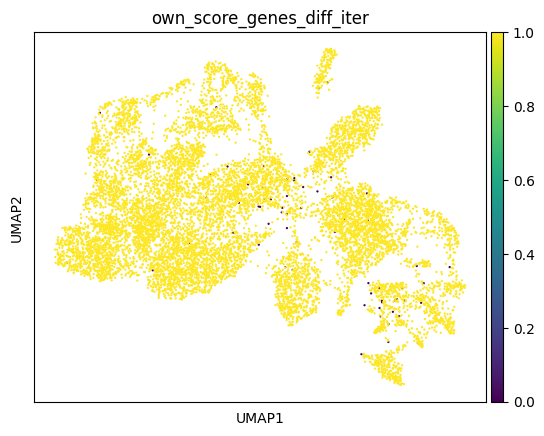

0.0065016031350195935


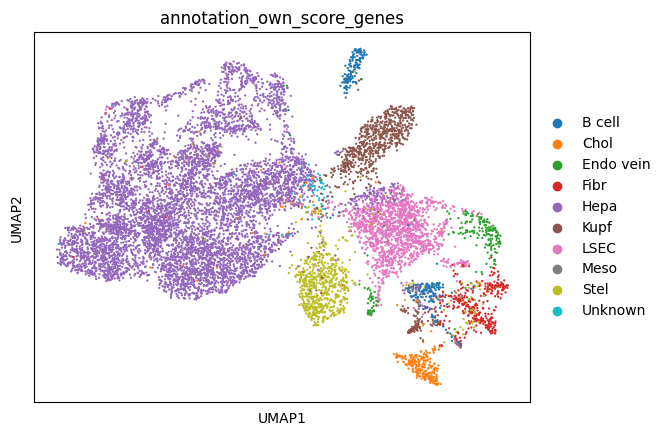

Hepa         0.618454
LSEC         0.131101
Kupf         0.074902
Stel         0.062344
Fibr         0.032063
B cell       0.027431
Chol         0.026808
Endo vein    0.019416
Unknown      0.005166
Meso         0.002316
Name: annotation_own_score_genes, dtype: float64


[0.06359102244389027,
 0.00908443177769861,
 0.0038297114356964732,
 0.004364089775561097,
 0.0065016031350195935]

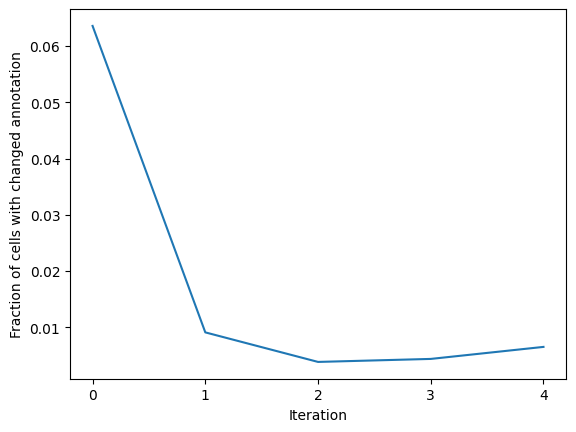

In [65]:
own_score_genes_iterative(sdata.table,path_mg,nr_iterations=5)

In [66]:
sdata.table.obs.columns

Index(['region', 'instance', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_2_genes',
       'pct_counts_in_top_5_genes', 'n_counts', 'shapeSize',
       'annotation_score_genes_25', 'cleanliness_score_genes_25',
       'score_celltype_own_score_genes',
       'second_score_celltype_own_score_genes', 'cleanliness_own_score_genes',
       'own_score_genes_diff_iter', 'annotation_own_score_genestest_without',
       'score_celltype_own_score_genestest_without',
       'second_score_celltype_own_score_genestest_without',
       'cleanliness_own_score_genestest_without',
       'annotation_own_score_genes_previous', 'annotation_own_score_genes'],
      dtype='object')

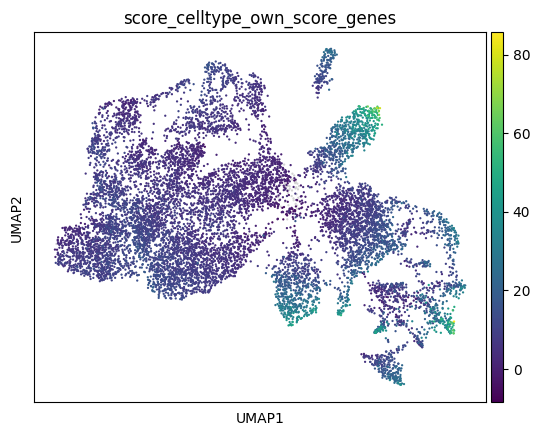

In [67]:
sc.pl.umap(sdata.table,color=['score_celltype_own_score_genes'])

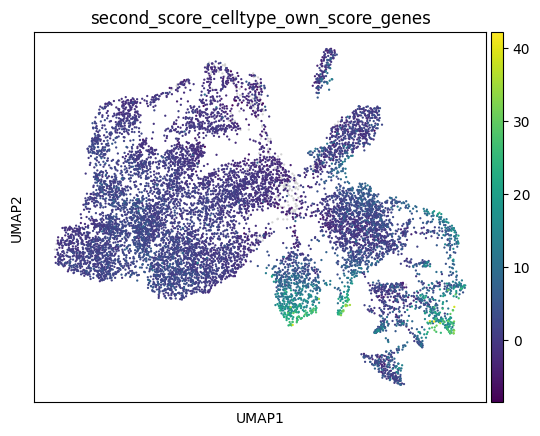

In [68]:
sc.pl.umap(sdata.table,color=['second_score_celltype_own_score_genes'])

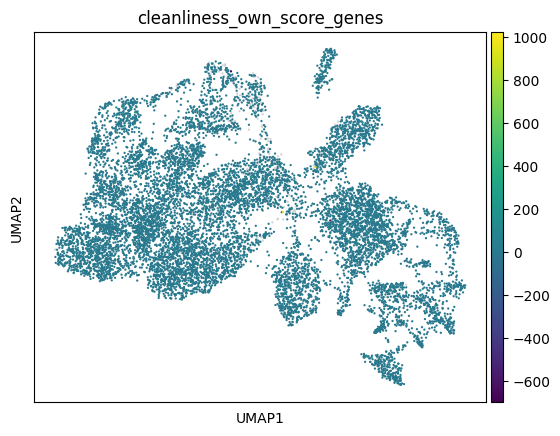

In [69]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes'])

Hepa         10
LSEC         11
Endo vein     9
Chol          7
Kupf         16
Stel         16
Fibr         21
B cell        4
Meso          5
dtype: int64


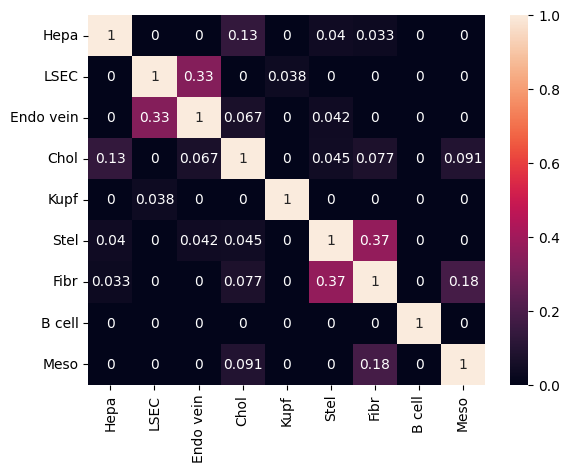

In [ ]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
Jaccard_similarity_matrix(path_mg)

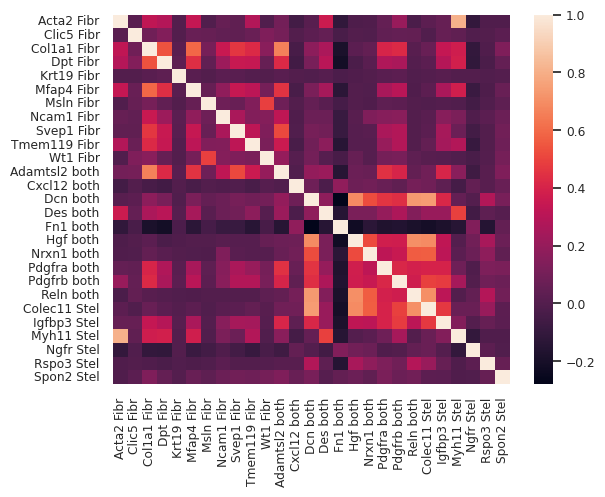

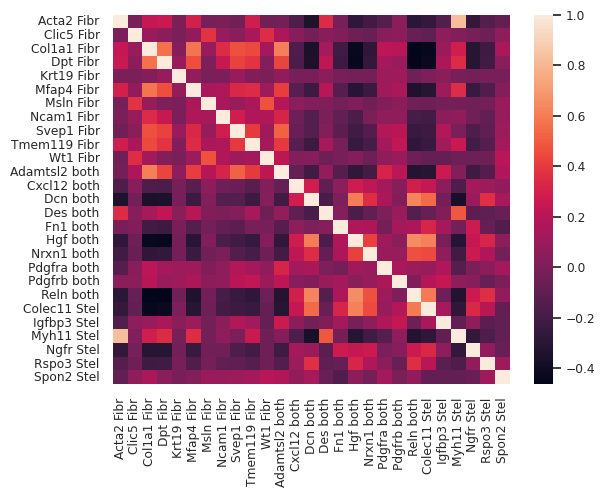

In [ ]:
# plot correlation matrix of the gene expression of the marker genes of 2 confused cell types
# confusion between fibroblasts and stellate cells
# expression of all cells
sns.set(font_scale=0.8)
correlation_matrix_expression_marker_genes_of_2_cell_types(sdata.table,path_mg,'Fibr','Stel')
plt.show()
# expression of cells that are classified as fibroblasts or stellate cells
adata_sub = sdata.table[(sdata.table.obs['annotation_own_score_genes'] == 'Fibr') | (sdata.table.obs['annotation_own_score_genes'] == 'Stel'),:]
correlation_matrix_expression_marker_genes_of_2_cell_types(adata_sub,path_mg,'Fibr','Stel')

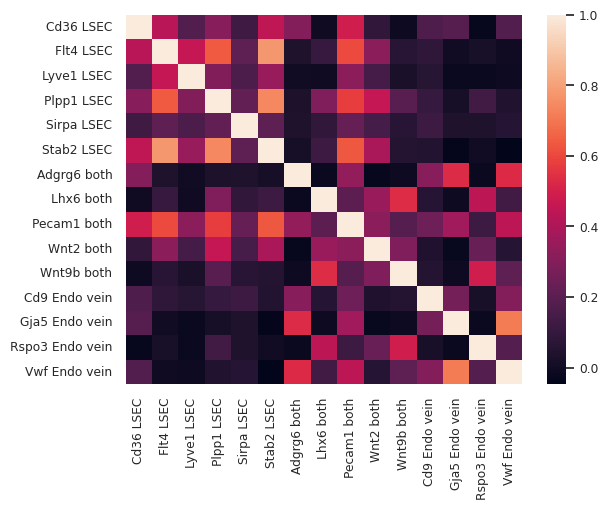

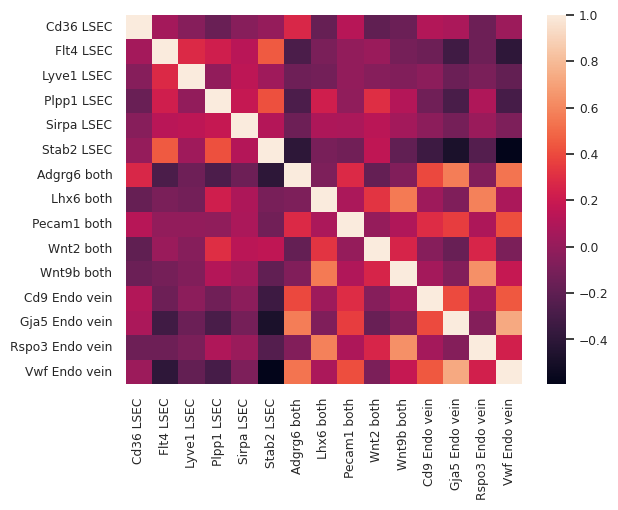

In [ ]:
# plot correlation matrix of the gene expression of the marker genes of 2 confused cell types
# confusion between LSECs and Endo vein cells
# expression of all cells
correlation_matrix_expression_marker_genes_of_2_cell_types(sdata.table,path_mg,'LSEC','Endo vein')
plt.show()
# expression of cells that are classified as fibroblasts or stellate cells
adata_sub = sdata.table[(sdata.table.obs['annotation_own_score_genes'] == 'LSEC') | (sdata.table.obs['annotation_own_score_genes'] == 'Endo vein'),:]
correlation_matrix_expression_marker_genes_of_2_cell_types(adata_sub,path_mg,'LSEC','Endo vein')

<AxesSubplot: >

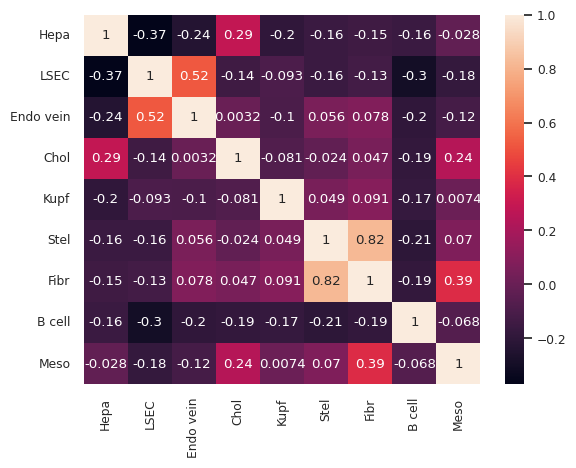

In [ ]:
# plot correlation matrix of the features
sns.heatmap(scores.corr(method='pearson'), annot=True)
# sns.heatmap(scores_minmax.corr(method='pearson'), annot=True) gives the same heatmap

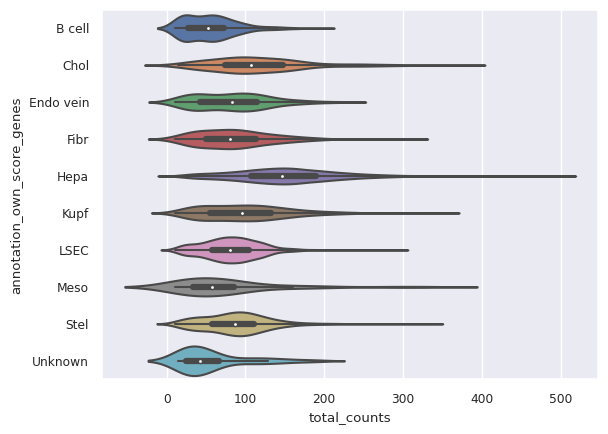

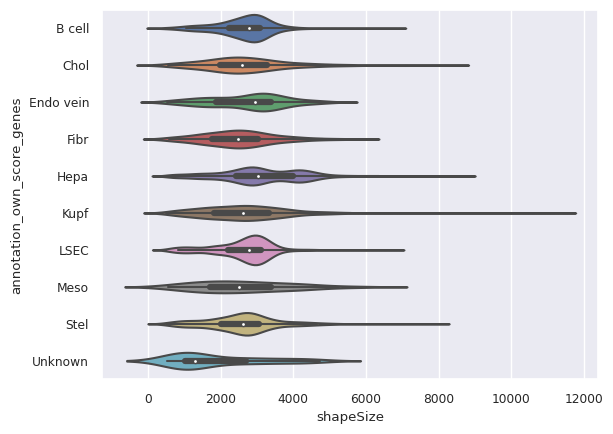

<AxesSubplot: xlabel='count_density', ylabel='annotation_own_score_genes'>

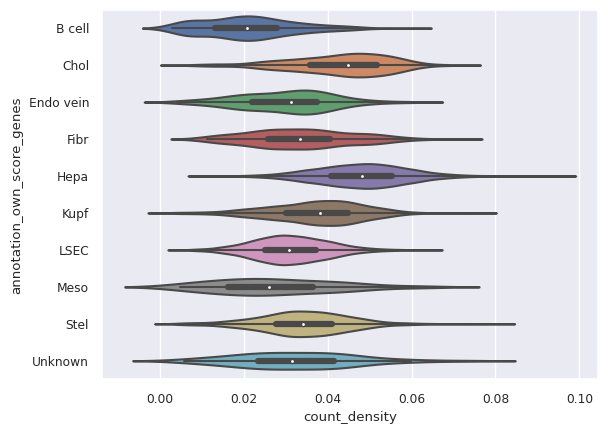

In [ ]:
sns.violinplot(data=sdata.table.obs,x="total_counts",y="annotation_own_score_genes")
plt.show()
sns.violinplot(data=sdata.table.obs,x="shapeSize",y="annotation_own_score_genes")
plt.show()
sdata.table.obs['count_density'] = sdata.table.obs['total_counts'] / sdata.table.obs['shapeSize']
sns.violinplot(data=sdata.table.obs,x="count_density",y="annotation_own_score_genes")

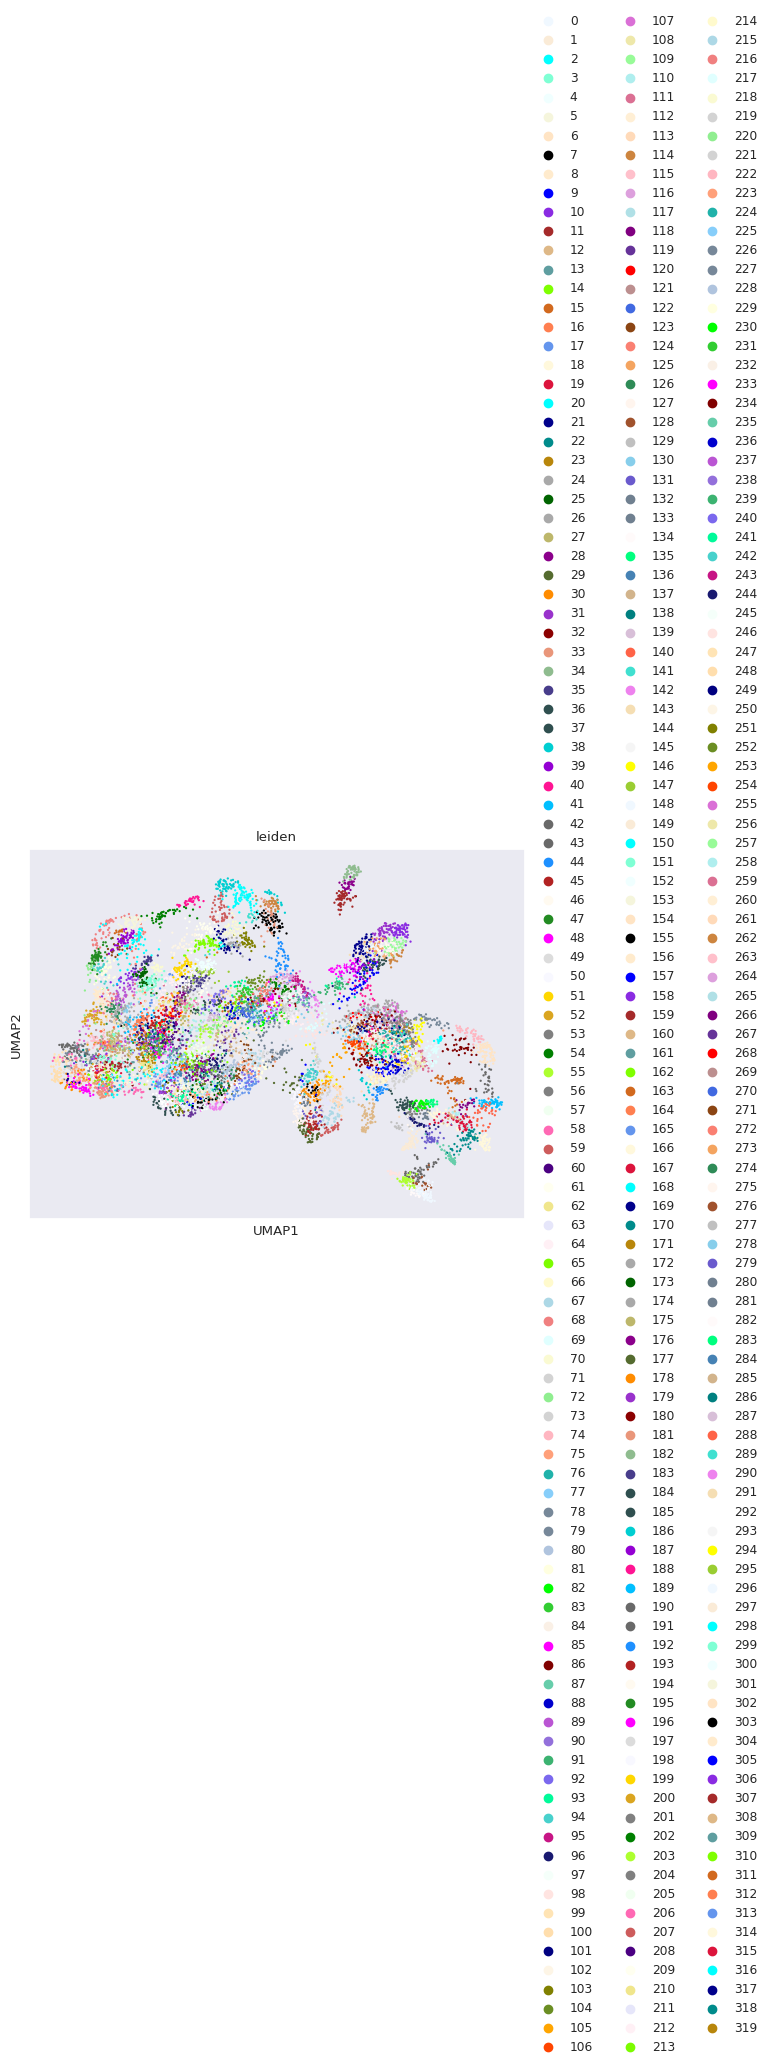

In [ ]:
sc.tl.leiden(sdata.table,resolution=30,key_added='leiden')
sc.pl.umap(sdata.table,color='leiden',palette=list(matplotlib.colors.CSS4_COLORS.values()))

Index(['B cell', 'Chol', 'Endo vein', 'Fibr', 'Hepa', 'Kupf', 'LSEC', 'Meso',
       'Stel', 'Unknown'],
      dtype='object')
Hepa
[2, 3, 4, 5, 7, 8, 13, 14, 16, 17, 20, 23, 24, 25, 26, 27, 28, 33, 35, 38, 39, 42, 44, 47, 48, 49, 51, 52, 54, 57, 58, 59, 60, 61, 62, 64, 65, 68, 70, 72, 73, 75, 77, 78, 80, 81, 83, 84, 85, 89, 90, 92, 93, 95, 96, 97, 99, 100, 101, 102, 103, 104, 107, 110, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 132, 133, 134, 136, 137, 138, 139, 142, 143, 144, 145, 147, 149, 150, 151, 152, 153, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 193, 195, 196, 197, 198, 200, 202, 203, 204, 205, 206, 208, 209, 210, 212, 213, 214, 215, 216, 218, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 245, 248, 249, 251, 252, 253, 254, 255, 257, 259, 263, 265, 267, 268, 269, 270, 271, 272, 

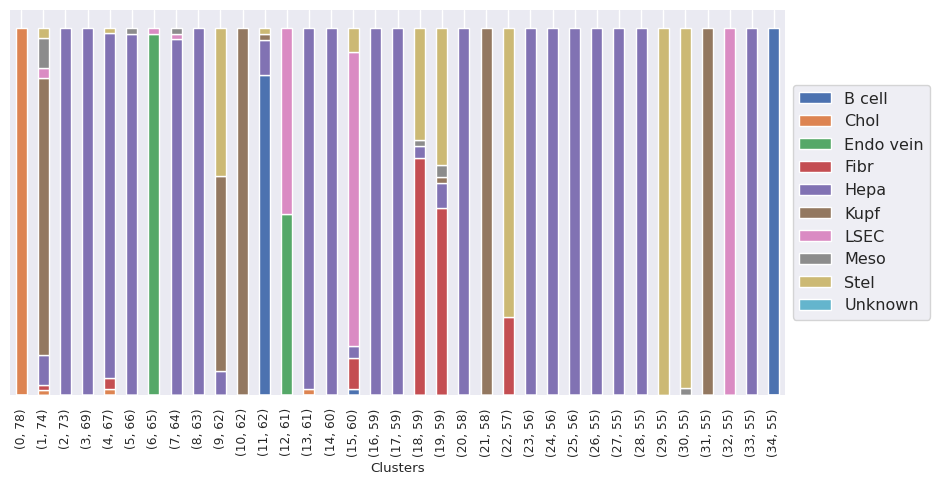

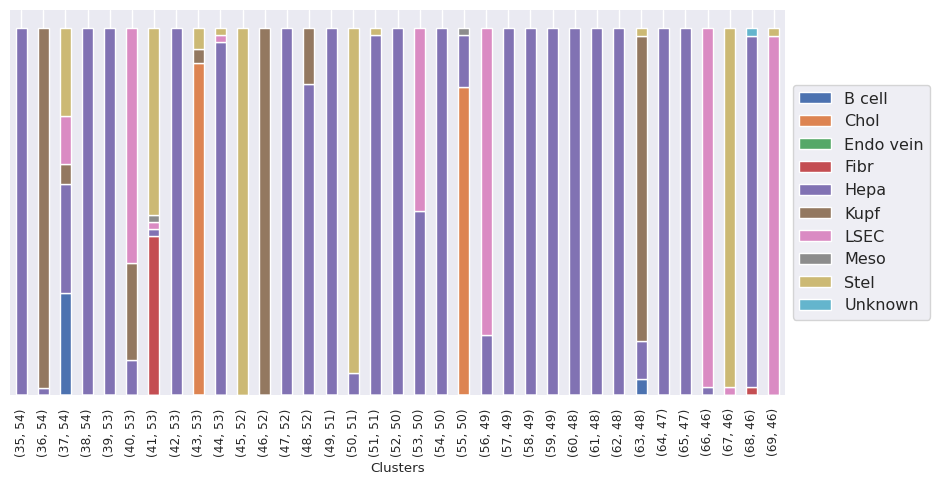

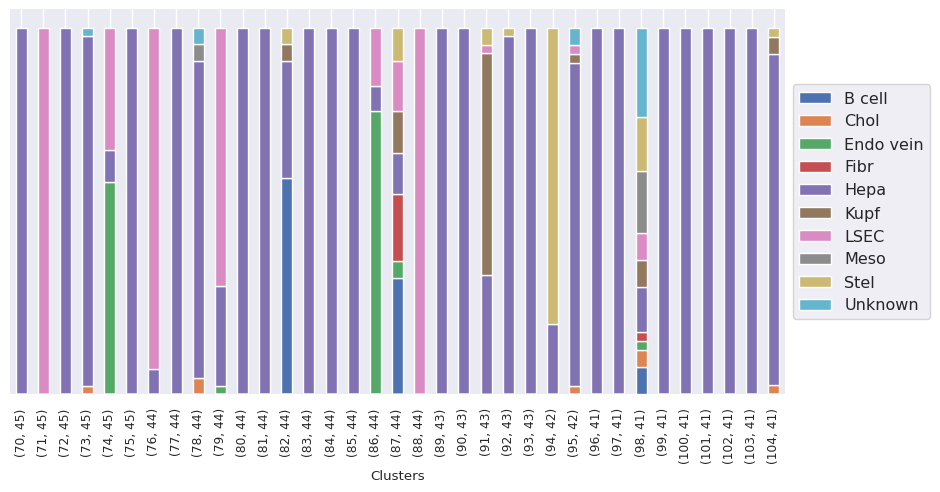

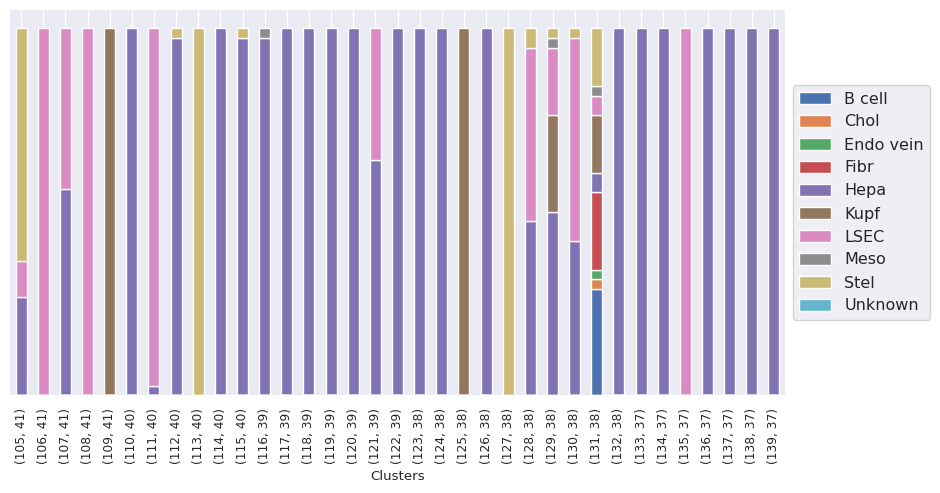

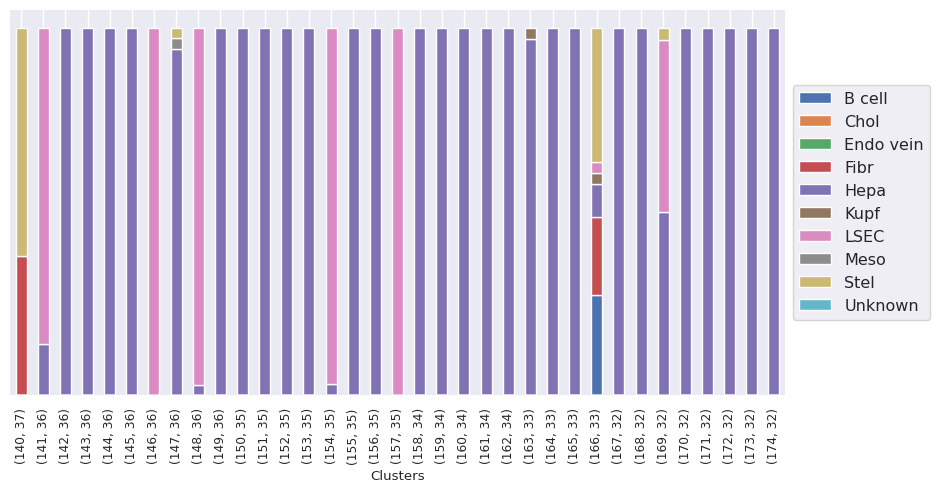

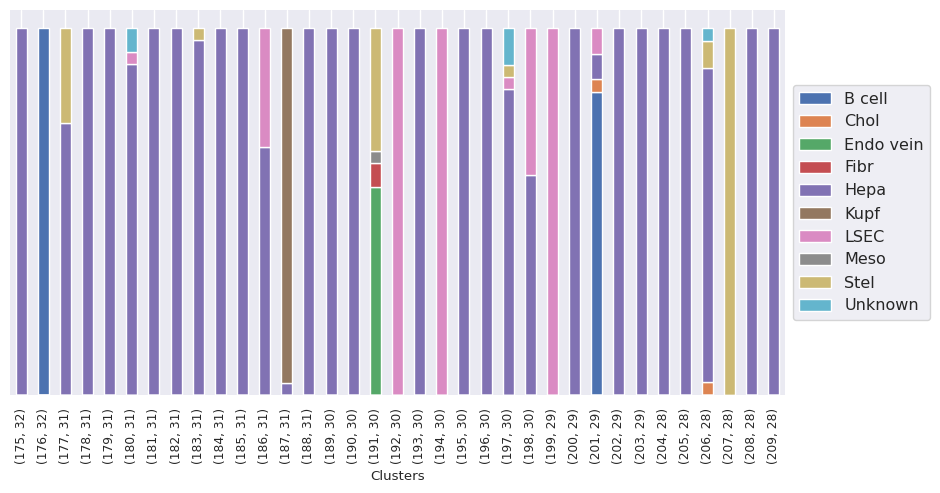

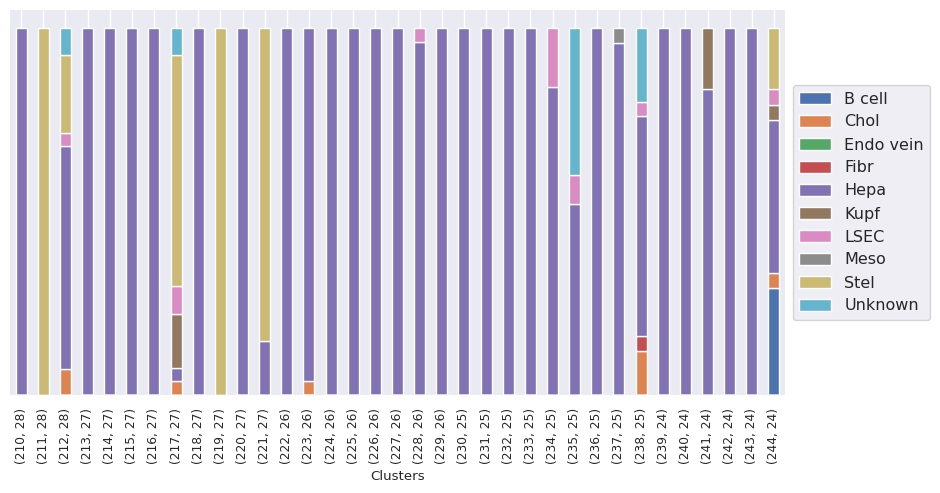

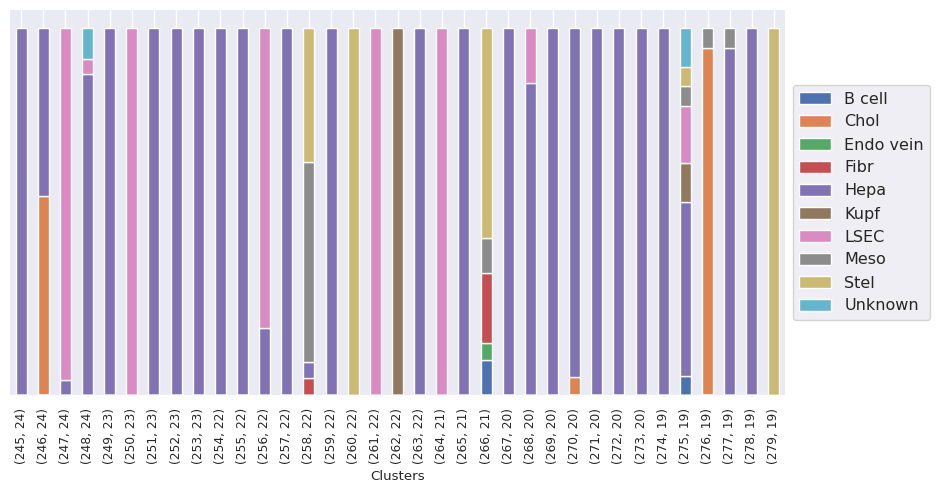

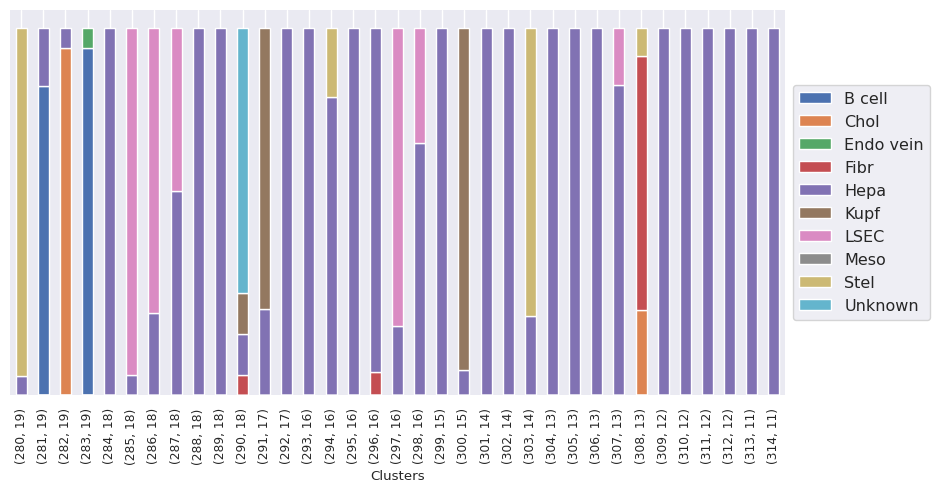

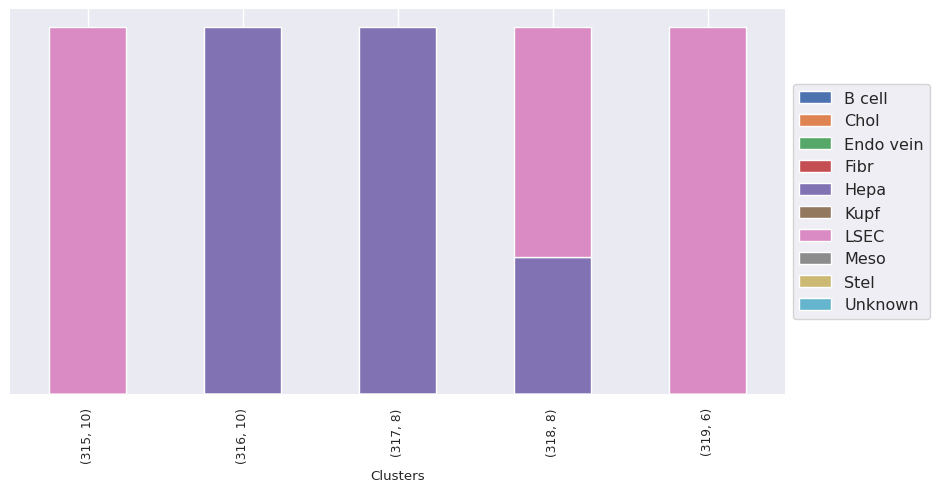

In [ ]:
cell_types = ['Hepa','Kupf','LSEC','Endo vein','Fibr','Stel','Meso','Chol','B cell','Unknown']
leiden_clusters_per_ct = clusteringVSleiden(sdata.table, "annotation_own_score_genes", "leiden",cell_types)

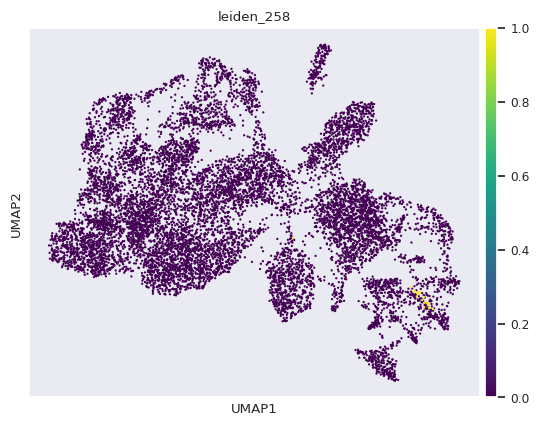

In [ ]:
sdata.table.obs['leiden_258'] = (sdata.table.obs['leiden'] == '258').astype(int)
sc.pl.umap(sdata.table,color=['leiden_258'],color_map='viridis')

In [ ]:
a = sdata.table.obs['leiden']
i = 0
for putative_leiden_clusters in leiden_clusters_per_ct:
    L = [str(x) for x in putative_leiden_clusters]
    for n in L:
        a = a.replace(n,cell_types[i])
    i += 1
sdata.table.obs['leiden_cell_types'] = a
# cells per leiden_cell_type cluster, to see the max number of n_cells you can take per cluster (149 in this case)
print(sdata.table.obs['leiden_cell_types'].value_counts())
min_cells_per_leiden_cell_type = sdata.table.obs['leiden_cell_types'].value_counts().min()
print(min_cells_per_leiden_cell_type)

Hepa         7289
LSEC         1199
Stel          799
Kupf          672
Unknown       429
B cell        260
Chol          243
Endo vein     184
Fibr          131
Meso           22
Name: leiden_cell_types, dtype: int64
22


Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Hgf', 'Stel'], ['Reln', 'Stel'], ['Fn1', 'Chol']]
Stel
Maybe drop:[['Fn1', 'Hepa'], ['Adamtsl2', 'Fibr']]
LSEC
Maybe drop:[['Adgrg6', 'Endo vein']]
Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Reln', 'Stel'], ['Hgf', 'Stel']]
Stel
Maybe drop:[['Fn1', 'Hepa'], ['Adamtsl2', 'Fibr']]
Chol
Maybe drop:[['Fn1', 'Hepa']]
LSEC
Maybe drop:[['Adgrg6', 'Endo vein']]
Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Fn1', 'Stel'], ['Nrxn1', 'Stel'], ['Reln', 'Stel'], ['Hgf', 'Stel'], ['Fn1', 'Chol']]
Stel
Maybe drop:[['Fn1', 'Hepa']]
Chol
Maybe drop:[['Fn1', 'Hepa']]
LSEC
Maybe drop:[['Adgrg6', 'Endo vein']]
Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Hgf', 'Stel'], ['Reln', 'Stel']]
Stel
Maybe drop:[['Fn1', 'Hepa'], ['Adamtsl2', 'Fibr']]
LSEC
Maybe drop:[['Sirpa', 'Kupf']]
Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Reln', 'Stel']]
Stel
Maybe drop:[['Fn1', 'Hepa'], ['Adamtsl2', 'Fibr']]
Chol
Maybe drop:[['Fn1', 'Hepa']]
LSEC
Maybe drop:[['Sirpa', 'Kupf'],

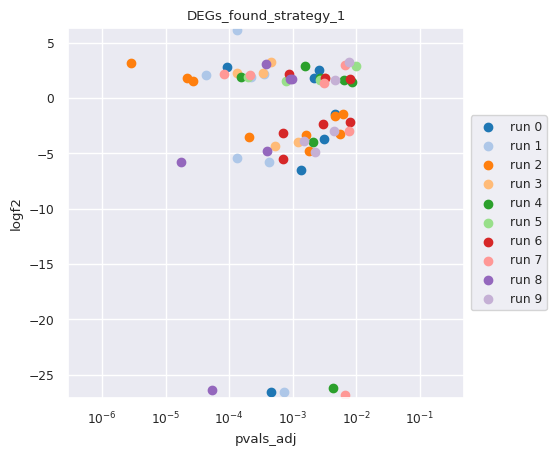

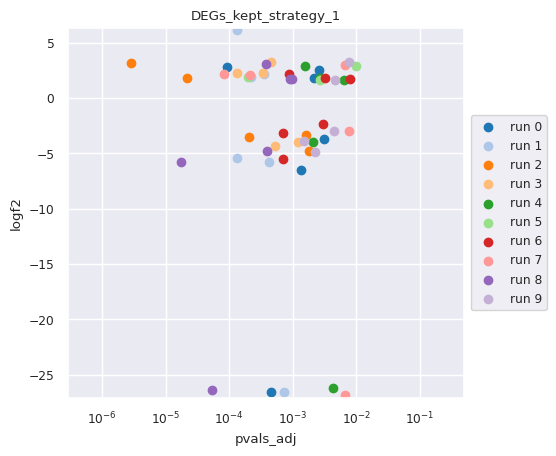

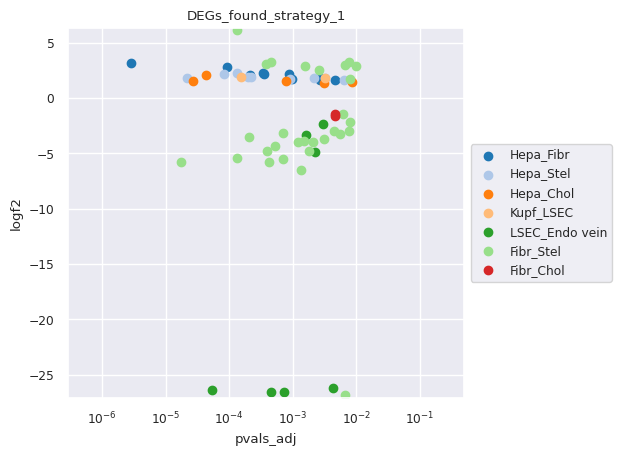

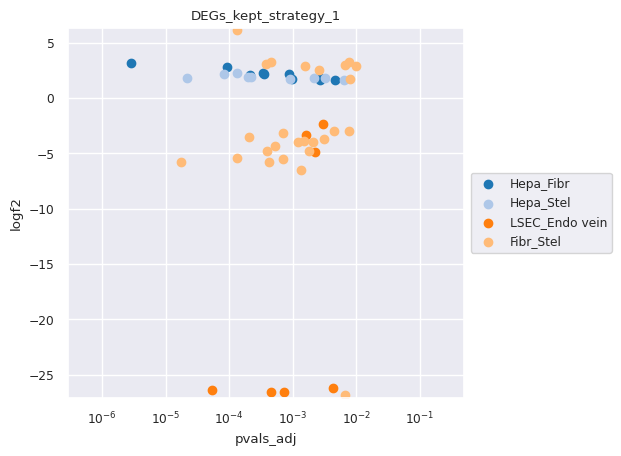

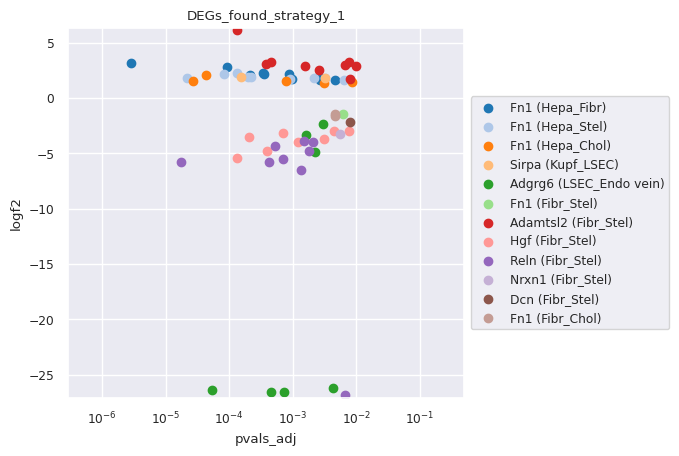

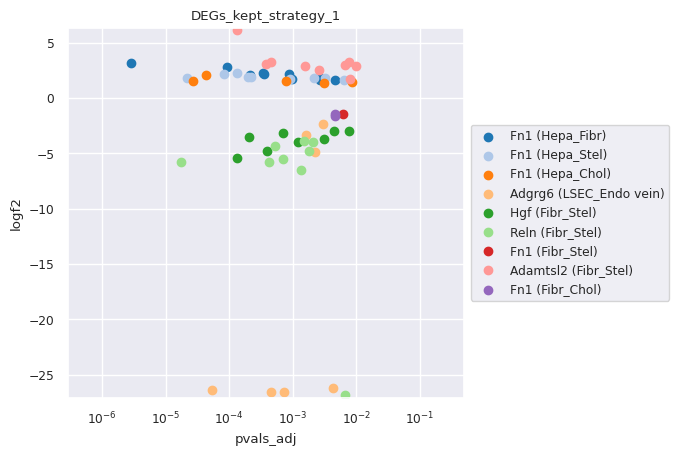

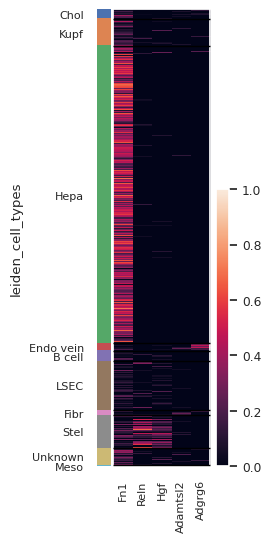

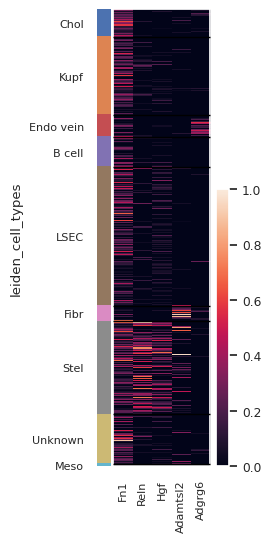

In [ ]:
# STRATEGY 1 to change the marker gene list
results_strat1_10, results_runs1_10, DEG_details_runs1_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters_per_ct,path_mg,10,min_cells_per_leiden_cell_type,1)

In [ ]:
# Update marker gene list based on STRATEGY 1:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_modified1.csv")

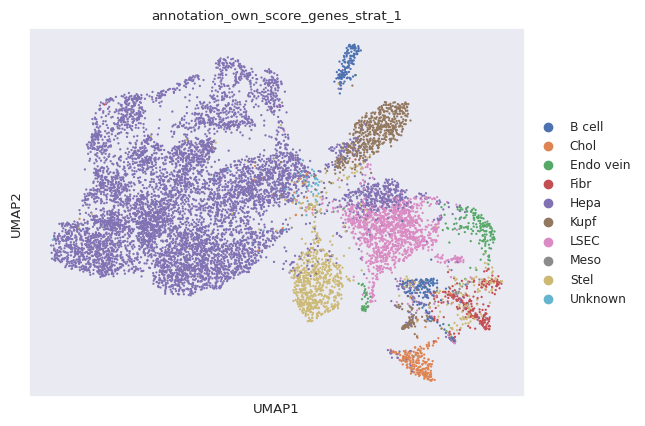

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_1
B cell                               2.582829
Chol                                 2.164232
Endo vein                            1.745636
Fibr                                 2.137513
Hepa                                66.343071
Kupf                                 5.913787
LSEC                                11.106163
Meso                                 0.418596
Stel                                 7.187389
Unknown                              0.400784


In [ ]:
# Own score genes with modified marker gene list based on STRATREGY 1
path_mg_mod1 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_modified1.csv"
scores = own_score_genes(sdata.table,path_mg_mod1,suffix='_strat_1')
visualize_classification(sdata,'annotation_own_score_genes_strat_1','umap_23_15',path_mg_mod1,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

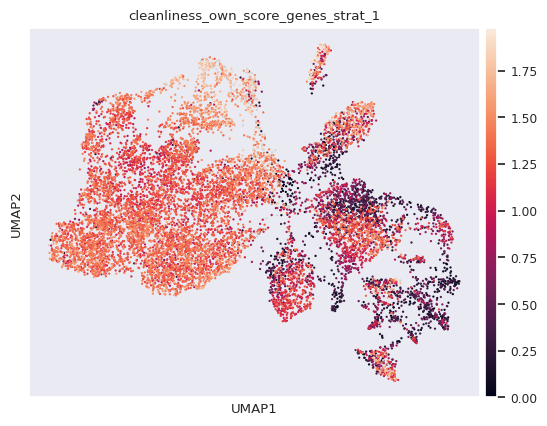

In [ ]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes_strat_1'])

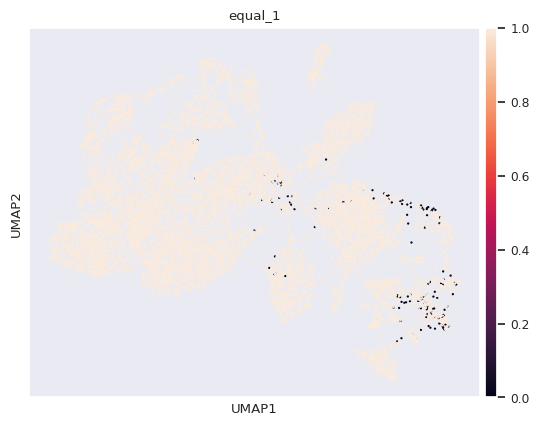

In [ ]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_1'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_1'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_1'])

Hepa         10
LSEC         10
Endo vein     9
Chol          7
Kupf         16
Stel         14
Fibr         18
B cell        4
Meso          5
dtype: int64


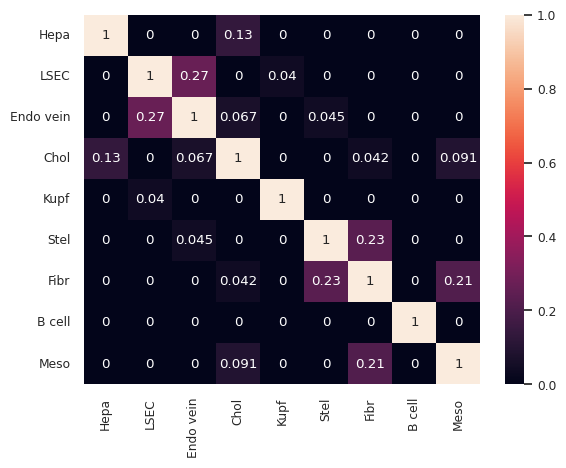

In [ ]:
Jaccard_similarity_matrix(path_mg_mod1)

Adamtsl2
Is marker gene of: ['Stel', 'Fibr']
Could also be a marker gene of: ['Meso']
Cd36
Is marker gene of: ['LSEC']
Could also be a marker gene of: ['Endo vein']
Col1a1
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Meso']
Igfbp3
Is marker gene of: ['Stel']
Could also be a marker gene of: ['Fibr']
Spn
Is marker gene of: []
Could also be a marker gene of: ['B cell']
Spon2
Is marker gene of: ['Stel']
Could also be a marker gene of: ['Meso']
Summary:
Meso
Maybe add:['Adamtsl2', 'Col1a1', 'Spon2']
Endo vein
Maybe add:['Cd36']
Fibr
Maybe add:['Igfbp3']
B cell
Maybe add:['Spn']
Adamtsl2
Is marker gene of: ['Stel', 'Fibr']
Could also be a marker gene of: ['Meso']
Cd36
Is marker gene of: ['LSEC']
Could also be a marker gene of: ['Endo vein']
Col1a1
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Meso']
Cyp2e1
Is marker gene of: ['Hepa']
Could also be a marker gene of: ['LSEC']
Igfbp3
Is marker gene of: ['Stel']
Could also be a marker gene of: ['Fibr']
Lpl
Is mar

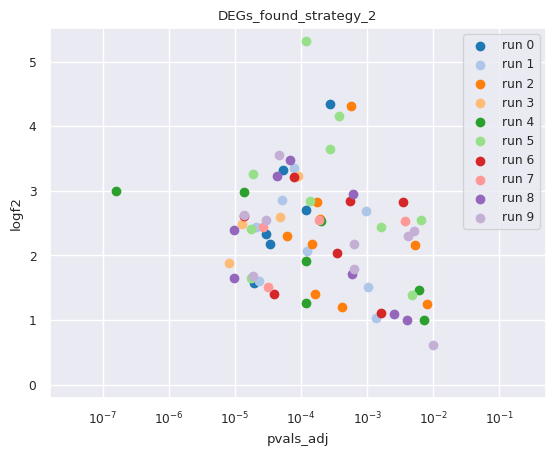

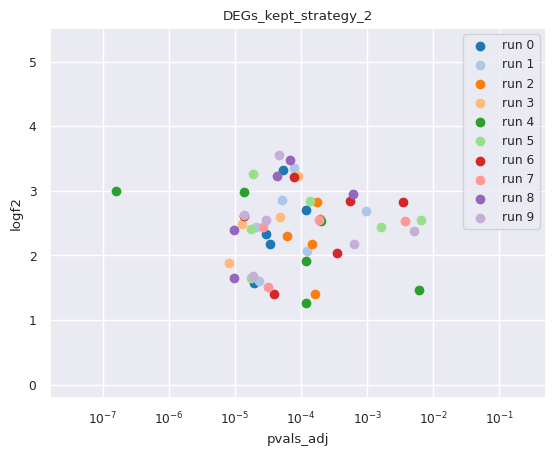

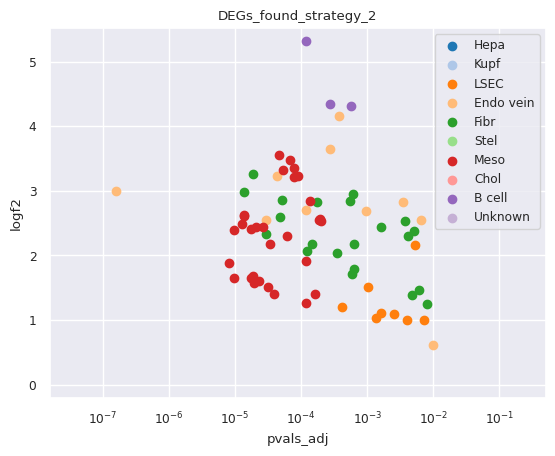

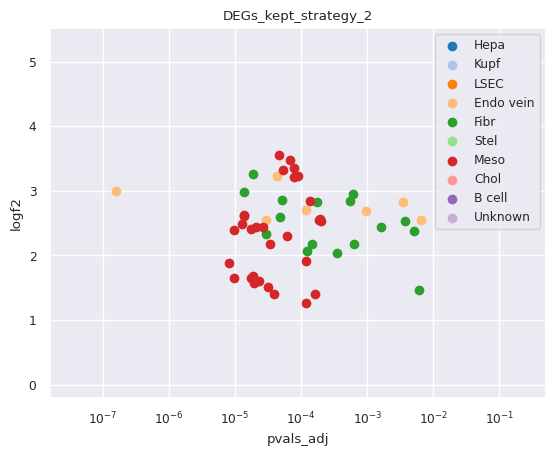

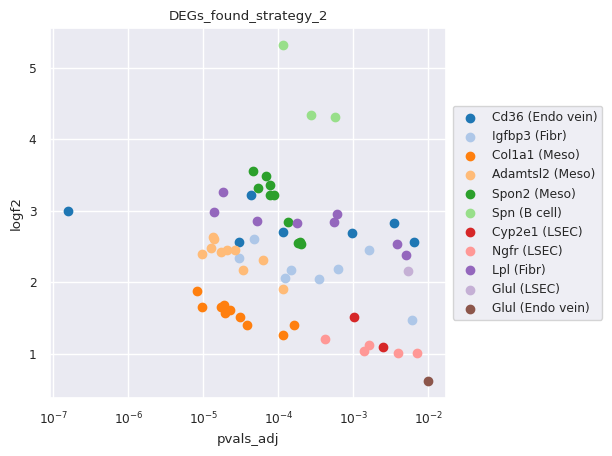

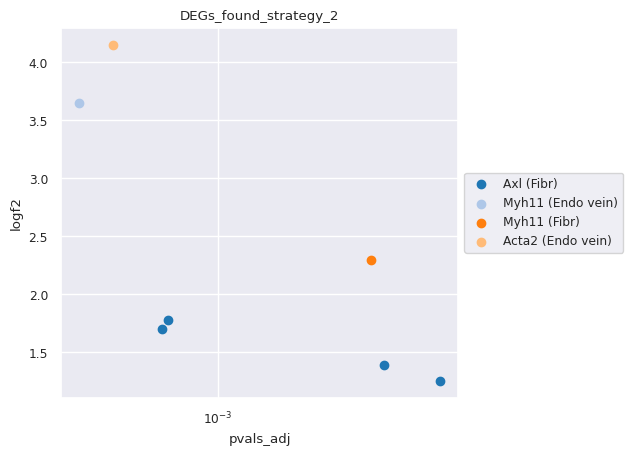

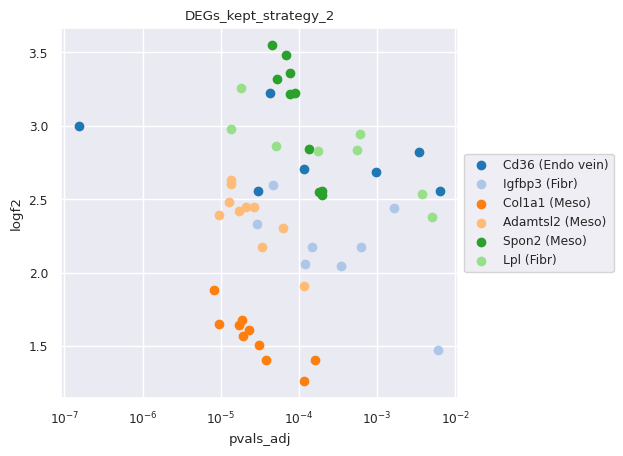

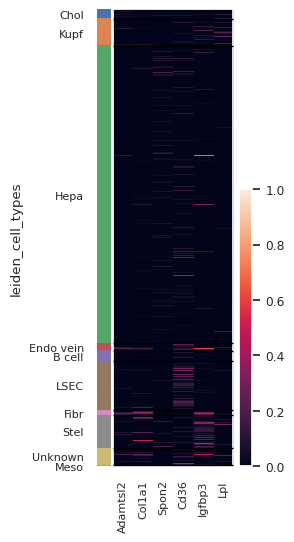

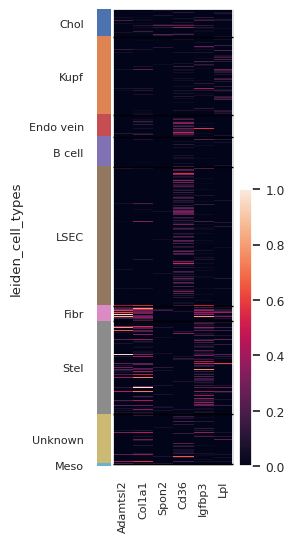

In [ ]:
# STRATEGY 2 to change the marker gene list
results_strat2_10, results_runs2_10, DEG_details_runs2_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters_per_ct,path_mg,10,min_cells_per_leiden_cell_type,2)

In [ ]:
# Update marker gene list based on STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 1
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_modified2.csv")

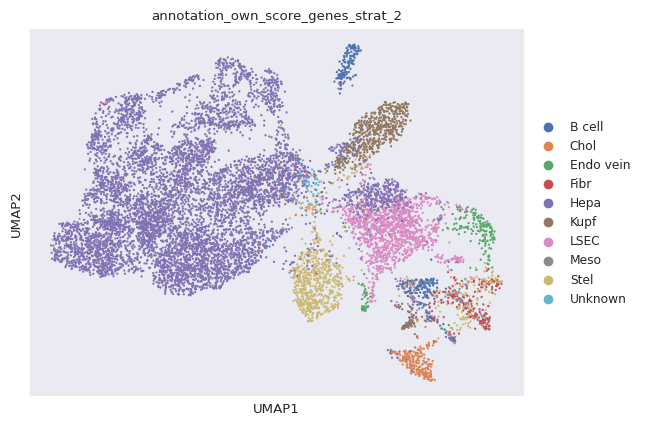

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_2
B cell                               2.582829
Chol                                 2.182045
Endo vein                            1.772355
Fibr                                 1.807980
Hepa                                66.129320
Kupf                                 5.931600
LSEC                                11.293196
Meso                                 0.463128
Stel                                 7.312077
Unknown                              0.525472


In [ ]:
# Own score genes with modified marker gene list based on STRATREGY 2
path_mg_mod2 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_modified2.csv"
scores = own_score_genes(sdata.table,path_mg_mod2,suffix='_strat_2')
visualize_classification(sdata,'annotation_own_score_genes_strat_2','umap_23_15',path_mg_mod2,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

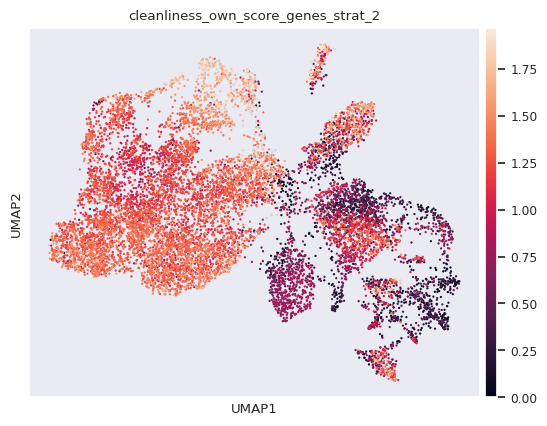

In [ ]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes_strat_2'])
# makes sense that this becomes worse, because more marker genes overlap between cell types
# but does not mean that the annotation is worse

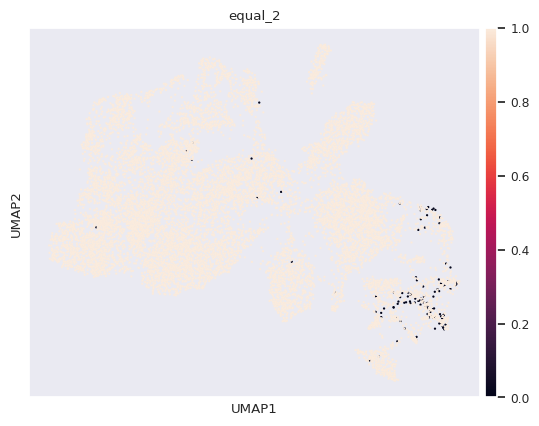

In [ ]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_2'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_2'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_2'])

Hepa         10
LSEC         11
Endo vein    10
Chol          7
Kupf         16
Stel         16
Fibr         23
B cell        4
Meso          8
dtype: int64


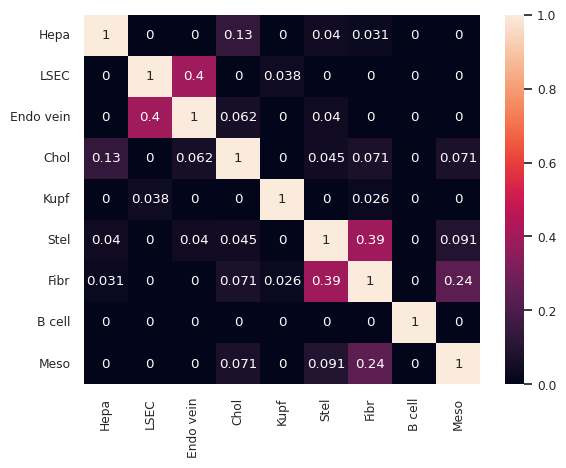

In [ ]:
Jaccard_similarity_matrix(path_mg_mod2)

In [ ]:
# STRATEGY 1 and STRATEGY 2 combined to change the marker gene list

In [ ]:
# Update marker gene list based on STRATEGY 1 and STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 1
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_modified_1_2.csv")

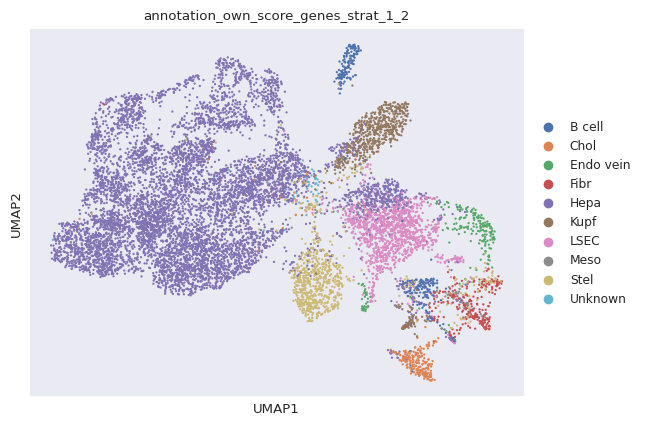

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_1_2
B cell                                 2.582829
Chol                                   2.199857
Endo vein                              1.932668
Fibr                                   2.306733
Hepa                                  66.298539
Kupf                                   5.931600
LSEC                                  11.026006
Meso                                   0.472034
Stel                                   6.848949
Unknown                                0.400784


In [ ]:
# Own score genes with modified marker gene list based on STRATREGY 1 and STRATEGY 2
path_mg_mod_1_2 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_modified_1_2.csv"
scores = own_score_genes(sdata.table,path_mg_mod_1_2,suffix='_strat_1_2')
visualize_classification(sdata,'annotation_own_score_genes_strat_1_2','umap_23_15',path_mg_mod_1_2,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

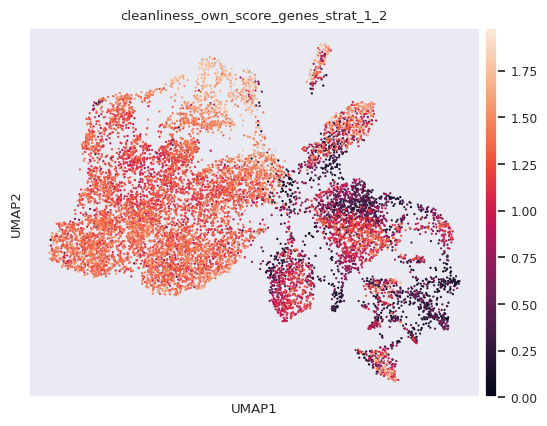

In [ ]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes_strat_1_2'])

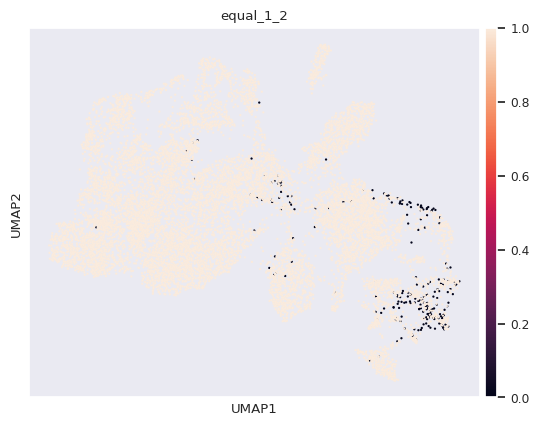

In [ ]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_1_2'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_1_2'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_1_2'])

Hepa         10
LSEC         10
Endo vein    10
Chol          7
Kupf         16
Stel         14
Fibr         20
B cell        4
Meso          8
dtype: int64


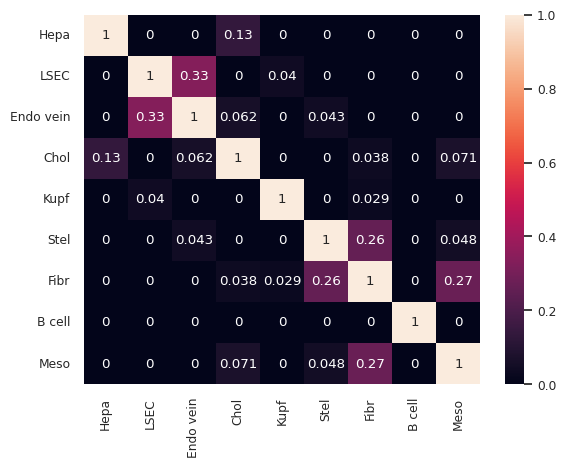

In [ ]:
Jaccard_similarity_matrix(path_mg_mod_1_2)